In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('test.csv')

In [3]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-27,122.800003,122.800003,119.820000,120.332497,88.088272,30646000.0
1,2004-08-30,121.237503,123.750000,120.625000,123.345001,90.293549,24465208.0
2,2004-08-31,123.312500,123.750000,122.000000,123.512497,90.416122,21194656.0
3,2004-09-01,123.750000,124.375000,122.949997,123.487503,90.397820,19935544.0
4,2004-09-02,123.737503,125.574997,123.250000,124.207497,90.924896,21356352.0


In [4]:
dataset['Date'] = pd.to_datetime(dataset.Date)

In [5]:
dataset.shape

(4494, 7)

In [6]:
dataset.drop('Adj Close',axis = 1, inplace = True)

In [7]:
dataset.head()

,Date,Open,High,Low,Close,Volume
0,2004-08-27,122.800003,122.800003,119.820000,120.332497,30646000.0
1,2004-08-30,121.237503,123.750000,120.625000,123.345001,24465208.0
2,2004-08-31,123.312500,123.750000,122.000000,123.512497,21194656.0
3,2004-09-01,123.750000,124.375000,122.949997,123.487503,19935544.0
4,2004-09-02,123.737503,125.574997,123.250000,124.207497,21356352.0


In [8]:
dataset.isnull().sum()

Date      0
Open      8
High      8
Low       8
Close     8
Volume    8
dtype: int64

In [9]:
dataset.isna().any()

Date      False
Open       True
High       True
Low        True
Close      True
Volume     True
dtype: bool

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4494 entries, 0 to 4493
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4494 non-null   datetime64[ns]
 1   Open    4486 non-null   float64       
 2   High    4486 non-null   float64       
 3   Low     4486 non-null   float64       
 4   Close   4486 non-null   float64       
 5   Volume  4486 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 210.8 KB


In [11]:
dataset.describe()

,Open,High,Low,Close,Volume
count,4486.000000,4486.000000,4486.000000,4486.000000,4.486000e+03
mean,1146.182768,1158.538059,1132.825428,1145.521462,3.620596e+06
std,994.070086,1003.010607,984.043404,993.346465,3.162368e+06
min,112.000000,116.112503,103.837502,111.550003,0.000000e+00
25%,290.693748,295.300010,285.931259,290.275009,1.942489e+06
50%,977.450012,995.000000,970.250000,981.337524,2.804749e+06
75%,1564.774963,1597.287476,1548.662537,1576.781219,4.297410e+06
max,4033.949951,4043.000000,3980.000000,4019.149902,8.806715e+07


In [12]:
print(len(dataset))

4494


<AxesSubplot:>

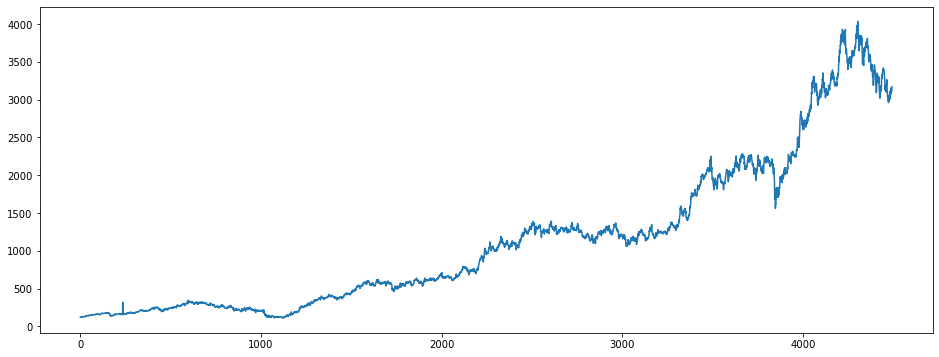

In [13]:
dataset['Open'].plot(figsize=(16,6))

In [14]:
X  = dataset[['Open','High','Low','Volume']]
y = dataset['Close']

In [15]:
corr_matrix = dataset.corr()
corr_matrix

,Open,High,Low,Close,Volume
Open,1.000000,0.999893,0.999891,0.999779,-0.235007
High,0.999893,1.000000,0.999877,0.999913,-0.232812
Low,0.999891,0.999877,1.000000,0.999905,-0.236762
Close,0.999779,0.999913,0.999905,1.000000,-0.234861
Volume,-0.235007,-0.232812,-0.236762,-0.234861,1.000000


<AxesSubplot:>

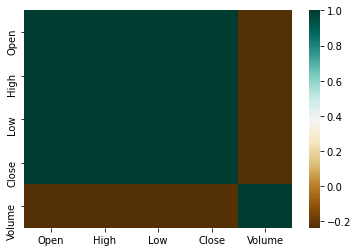

In [16]:
import seaborn as sns
# importing seaborn it is a visualization library
sns.heatmap(corr_matrix,cmap='BrBG')

Text(0.5, 1.0, 'High and Close')

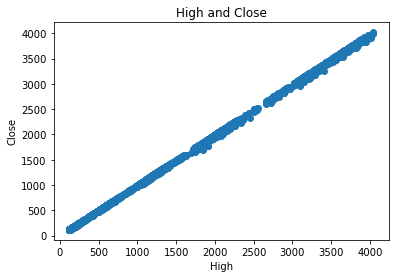

In [17]:
# Scatter Plot Between High and Low
plt.scatter(dataset['High'],dataset['Close'])
plt.xlabel('High')
plt.ylabel('Close')
plt.title('High and Close')
# High and close are highly correlated

Text(0.5, 1.0, 'Volume and Close')

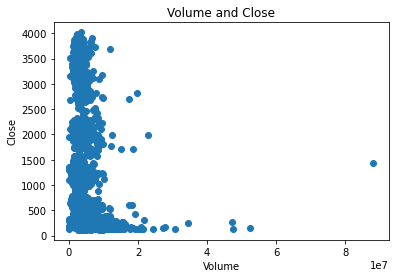

In [18]:
# Scatter Plot Between Volume and Low
plt.scatter(dataset['Volume'],dataset['Close'])
plt.xlabel('Volume')
plt.ylabel('Close')
plt.title('Volume and Close')
# Volume and close are not much correlated

In [19]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X ,y , random_state = 0)

In [20]:
X_train.shape

(3370, 4)

In [21]:
X_test.shape

(1124, 4)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()

In [23]:
print(X_test)

             Open         High          Low     Volume
2445  1199.500000  1222.500000  1196.000000  1526762.0
2031   657.450012   660.174988   655.099976  1579768.0
3368  1463.275024  1481.875000  1460.175049  1809424.0
1888   584.500000   594.900024   583.500000  2165054.0
1867   607.000000   611.224976   600.500000  1540878.0
...           ...          ...          ...        ...
257    169.457504   173.875000   169.457504  5807592.0
1912   612.000000   618.450012   610.599976  2745190.0
2224   920.500000   920.500000   904.075012  2077574.0
1765   527.250000   531.500000   520.500000  3415262.0
3484  2077.000000  2121.000000  2050.149902  4508530.0

[1124 rows x 4 columns]


In [24]:
dataset.head(25)

,Date,Open,High,Low,Close,Volume
0,2004-08-27,122.800003,122.800003,119.820000,120.332497,30646000.0
1,2004-08-30,121.237503,123.750000,120.625000,123.345001,24465208.0
2,2004-08-31,123.312500,123.750000,122.000000,123.512497,21194656.0
3,2004-09-01,123.750000,124.375000,122.949997,123.487503,19935544.0
4,2004-09-02,123.737503,125.574997,123.250000,124.207497,21356352.0
5,2004-09-03,125.750000,137.500000,123.794998,124.732498,9869856.0
6,2004-09-06,129.987503,129.987503,124.112503,124.357498,9038672.0
7,2004-09-07,129.375000,129.375000,124.375000,124.449997,5772232.0
8,2004-09-08,124.500000,125.099998,123.887497,124.212502,6593984.0
9,2004-09-09,124.625000,124.737503,122.307503,122.495003,7947184.0


In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score

<AxesSubplot:>

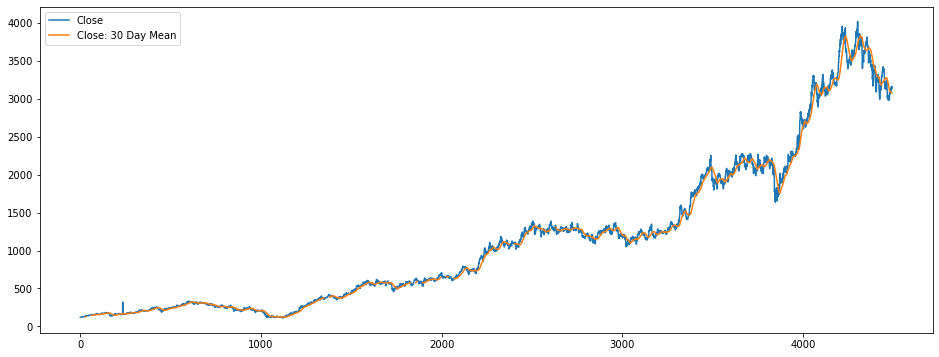

In [26]:
dataset['Close: 30 Day Mean'] = dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

<AxesSubplot:>

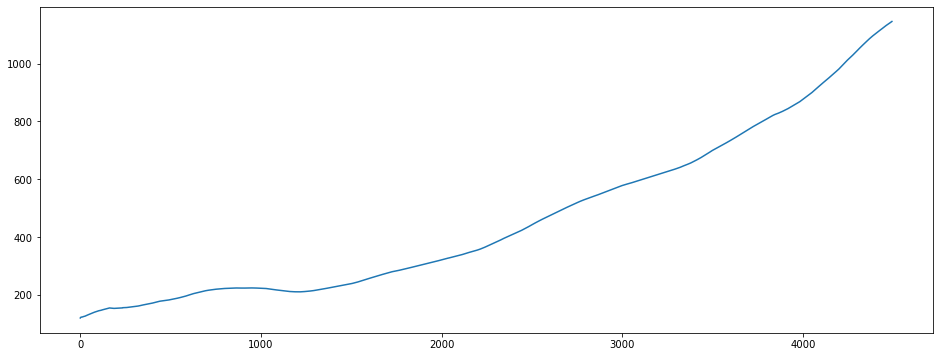

In [27]:
dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))